# TABLE OF CONTENTS
### [OVERVIEW OF OSEMiNl](#OVERVIEW-OF-OSEMiN)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

# OVERVIEW OF OSEMiN


<img src='https://raw.githubusercontent.com/learn-co-curriculum/online-ds-ft-100719/master/osemind.png?token=AKWNGY6ANK33DJDTWNP7OOK5WTWRU' width=800>
<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html">Source: KDNuggets</a></center>

> ### The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
> ### It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 

- **[OBTAIN](#OBTAIN)**

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

- **[SCRUB](#SCRUB)**

During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

- **[EXPLORE](#EXPLORE)**

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

- **[MODEL](#MODEL)**

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

- **[iNTERPRET](#iNTERPRET)**

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  


## Additional Links
* ML models google sheet https://docs.google.com/spreadsheets/d/1qe4nYjGKSxBNCkeV2gxxgObBpKKc0TKrbk0Y9LTrpV8
* How to detect and remove outliers:
    * https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* How to handle categorical variables. 
    * https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
* Sci-Kit Learn’s Scalers visually explained 
    * http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

# PROCESS CHECKLIST

1. **OBTAIN:**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ]  Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

In [1]:
# PyPi package for cohort
!pip install -U fsds_100719 # comment out after install so it won't run again

Requirement already up-to-date: fsds_100719 in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.0)


You should consider upgrading via the 'pip install --upgrade pip' command.


# OBTAIN

In [26]:
!pip install -U fsds_100719
import IPython.display as disp
disp.clear_output()

In [3]:
# Shortcut import of 
# import pandas as pd, numpy as np, etc...
import fsds_100719 as fs
from fsds_100719.imports import *

Package,Handle,Description
cufflinks,cf,"Adds df.iplot() interactive Plotly figs. To use, run >> cf.go_offline()"
fsds_100719,fs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


In [4]:
%ls

CONTRIBUTING.md               kc_house_data.csv
LICENSE.md                    mod1_project_JMI-Copy1.ipynb
OSEMIN_scaffolding.ipynb      mod1_project_JMI.ipynb
README.md                     module1_project_rubric.pdf
Untitled.ipynb                student.ipynb
awesome.gif                   study_group_starter.ipynb
column_names.md               untitled


In [5]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [6]:
# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns
pd.set_option('display.max_columns',0)
# pd.set_option('display.max_rows','')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# EXPLORE

In [22]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series_feature, series_target=None):#,max_unique=10):
    """Takes a series from a dataframe (df[col]), 
    reports back info on unique values, nulls, .describe() stats.
    
    
    Args:
        series (series (DataFrame column)): column to report    
    """
    dashes = '---'*25
    series=series_feature
    
    
    print(dashes)
    
    print(f"series dtype is {series.dtype}\n")
    print(f'- Unique Values for {series.name}')
    display(series.value_counts())#[:max_unique])
    
    print('n- Null Values ')
    nulls = series.isna().sum()
    print(nulls)
    
    print('\n\tDescribe')
    print(series.describe())
    
    if series.dtype != 'object':
        sns.distplot(series)
        plt.show()
    else:
        print(f"{series.name} is a string column and cannot be plotted")

    if series_target is not None:
        
        # Add your scatterplot here
        pass 

In [25]:
# fs.ihelp(check_column)

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_above


1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64


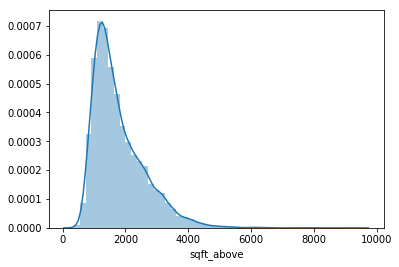

In [24]:
check_column(df['sqft_above'])

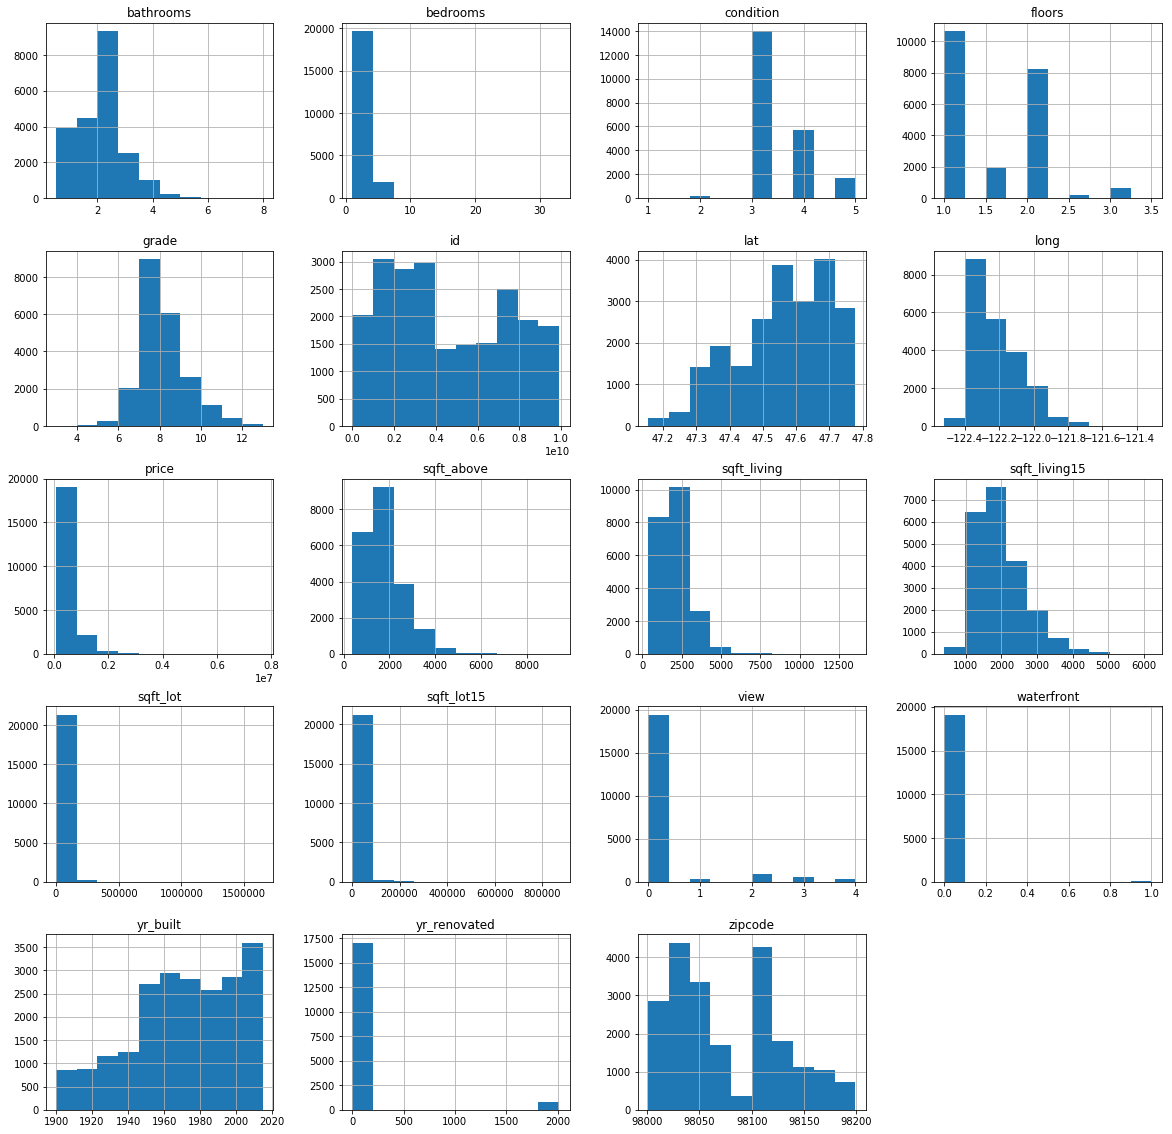

In [11]:
df.hist(figsize=(20,20));

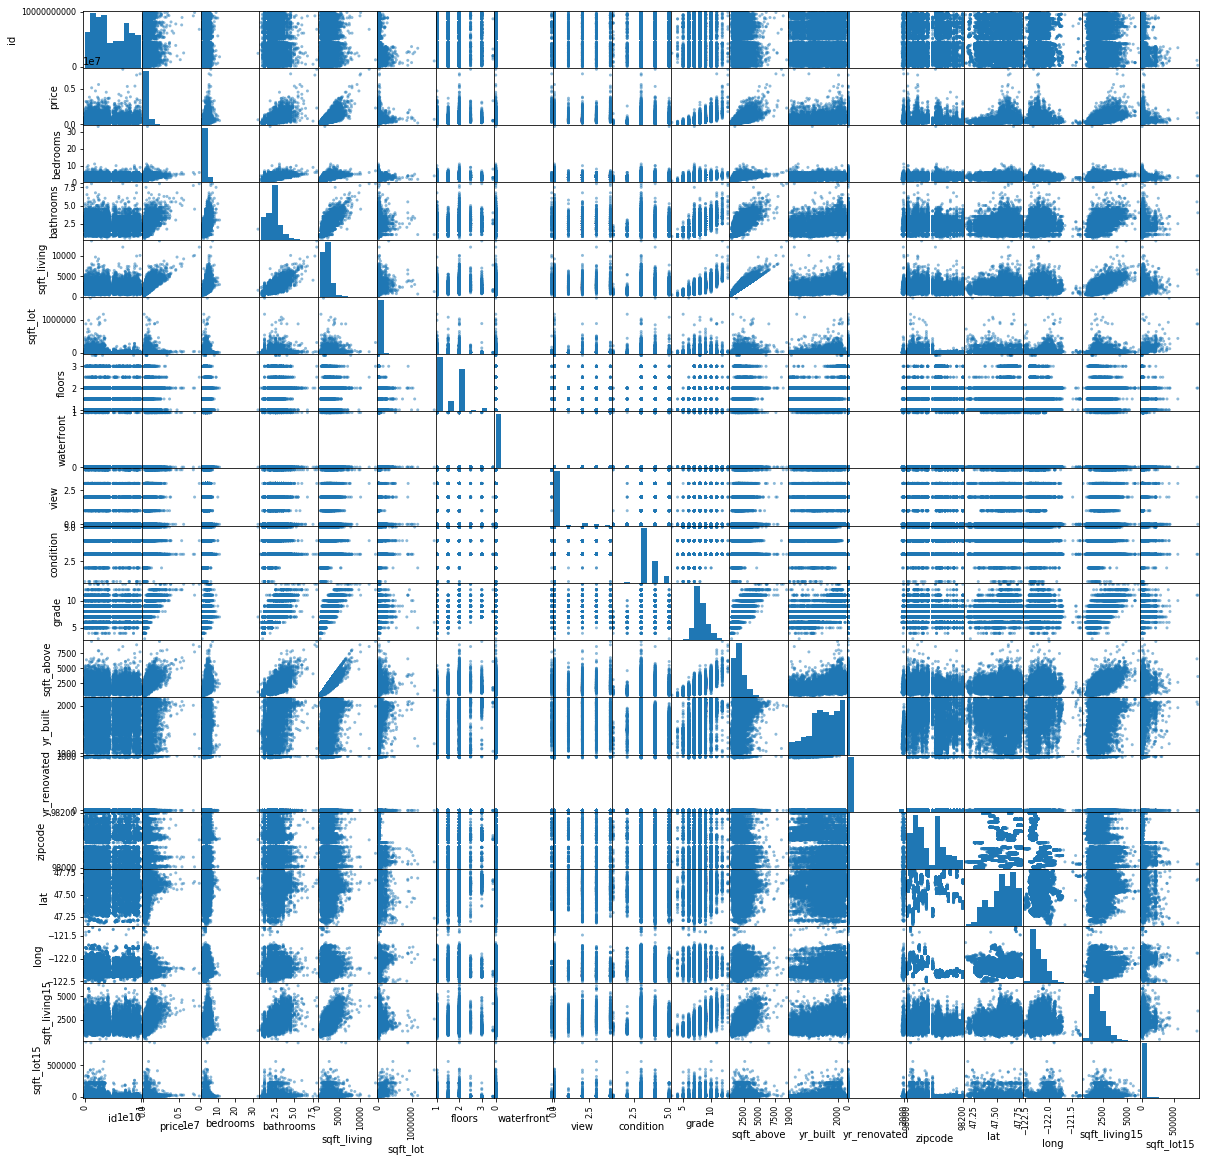

In [12]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

# MODEL

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS